# Proyecto Analisis Productos en Catalogo Digital

## Importacion de librerias

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Generacion de dataframes a partir de archivo

In [3]:
path = "/Users/alejandropascuale/Library/CloudStorage/GoogleDrive-alegpascuale@gmail.com/Mi unidad/Personal/Data Science I - Fundamentos para la Ciencia de Datos/Proyecto/Dataset/Productos Catalogo Digital.xlsx"

products = pd.read_excel(path, sheet_name="Productos")
attributes = pd.read_excel(path, sheet_name="Atributos")
sales = pd.read_excel(path, sheet_name="Ventas")

## Informacion basica de los dataframes

In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               294 non-null    int64  
 1   Nombre Producto  294 non-null    object 
 2   Categorias       294 non-null    object 
 3   Estado           294 non-null    object 
 4   Precio Normal    294 non-null    float64
 5   Stock Cantidad   294 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 13.9+ KB


In [5]:
products.isna().sum()

ID                 0
Nombre Producto    0
Categorias         0
Estado             0
Precio Normal      0
Stock Cantidad     0
dtype: int64

In [6]:
attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2389 non-null   int64 
 1   Producto         2389 non-null   object
 2   Nombre Atributo  2389 non-null   object
 3   Valor Atributo   2389 non-null   object
dtypes: int64(1), object(3)
memory usage: 74.8+ KB


In [7]:
attributes.isna().sum()

ID                 0
Producto           0
Nombre Atributo    0
Valor Atributo     0
dtype: int64

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7833 entries, 0 to 7832
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   FECHA_DE_EMISION                7833 non-null   datetime64[ns]
 1   TIPO_COMPROBANTE                7833 non-null   object        
 2   NRO_COMPROBANTE                 7833 non-null   object        
 3   ID                              7833 non-null   int64         
 4   CLIENTE                         7833 non-null   object        
 5   NOMBRE_PROVINCIA_CLIENTE        7833 non-null   object        
 6   ID PRODUCTO                     7833 non-null   int64         
 7   CANTIDAD                        7833 non-null   float64       
 8   UM_STOCK                        7833 non-null   object        
 9   PORC_DESCUENTO                  7833 non-null   int64         
 10  DESCRIPCION_CONDICION_DE_VENTA  7833 non-null   object        
dtypes: d

In [9]:
sales.isna().sum()

FECHA_DE_EMISION                  0
TIPO_COMPROBANTE                  0
NRO_COMPROBANTE                   0
ID                                0
CLIENTE                           0
NOMBRE_PROVINCIA_CLIENTE          0
ID PRODUCTO                       0
CANTIDAD                          0
UM_STOCK                          0
PORC_DESCUENTO                    0
DESCRIPCION_CONDICION_DE_VENTA    0
dtype: int64

In [10]:
def fix_state_name(state):
    if state == 'Entre ríos':
        state = 'Entre rios'
    if state == 'Río negro':
        state = 'Rio negro'
    if state == 'Neuquén':
        state = 'Neuquen'
    return state

sales['NOMBRE_PROVINCIA_CLIENTE'] = sales['NOMBRE_PROVINCIA_CLIENTE'].str.capitalize()
sales['NOMBRE_PROVINCIA_CLIENTE'] = sales['NOMBRE_PROVINCIA_CLIENTE'].apply(fix_state_name)
np.sort(sales['NOMBRE_PROVINCIA_CLIENTE'].unique())

array(['.', 'Buenos aires', 'Capital federal', 'Catamarca', 'Chaco',
       'Chubut', 'Corrientes', 'Córdoba', 'Entre rios', 'Formosa',
       'La pampa', 'La rioja', 'Mendoza', 'Misiones', 'Neuquen',
       'Rio negro', 'Salta', 'San juan', 'San luis', 'Santa cruz',
       'Santa fe', 'Santiago del estero', 'Tierra del fuego', 'Tucuman'],
      dtype=object)

In [11]:
sales = pd.merge(
    sales, products,
    left_on='ID PRODUCTO', right_on='ID',
    how='inner'
)

In [12]:
sales.rename(columns={'ID_x': 'ID_CLIENTE'}, inplace=True)
sales.drop(columns='ID_y', inplace=True)

In [13]:
sales["TOTAL_USD"] = (sales["CANTIDAD"] * sales['Precio Normal'] * (1 - sales['PORC_DESCUENTO'] / 100)).round(2)

In [14]:
sales.sample(5)

,FECHA_DE_EMISION,TIPO_COMPROBANTE,NRO_COMPROBANTE,ID_CLIENTE,CLIENTE,NOMBRE_PROVINCIA_CLIENTE,ID PRODUCTO,CANTIDAD,UM_STOCK,PORC_DESCUENTO,DESCRIPCION_CONDICION_DE_VENTA,Nombre Producto,Categorias,Estado,Precio Normal,Stock Cantidad,TOTAL_USD
922,2023-10-30,FAC,BH54BURYUYP8SY,1073,"Osinski, Windler and Hyatt",Buenos aires,9956,2.25,M2,30,CONTADO,Soto de Viñuelas,PORCELANATOS Y CERAMICAS,publish,14.41,21212,22.70
4734,2023-06-06,FAC,ME513548034419,984,Kirlin Inc,Buenos aires,12331,7.20,M2,0,CONTADO,Prado Luminoso,PORCELANATOS Y CERAMICAS,publish,28.21,1168,203.11
1547,2023-03-14,FAC,SK610979184013,238,Kuhlman Inc,Capital federal,9619,8.21,M2,0,15 DIAS F.F.,Ventanas al Mar,PISOS SPC,publish,22.68,32896,186.16
2260,2023-05-31,FAC,LU49037VSKNJP5,984,Kirlin Inc,Buenos aires,13804,26.00,M2,0,15 DIAS F.F.,Joya Preciosa,PISOS MELAMINA WATERPROOF,publish,22.68,2023,589.62
6431,2023-07-20,FAC,RS682811401157,3617,Ryan-Langworth,Buenos aires,9237,300.00,M2,0,CONTADO,Carmín Living,PISOS VINILICOS,pending,7.15,21146,"2,145.00"


# Hipotesis del analisis

El objetivo de este analisis es determinar los siguientes puntos:
- **Cantidad de productos** que tiene la empresa a la venta, segmentados por familia, valor y stock disponible, de manera de reconocer tendencias de venta y llegar a conclusiones sobre que se vende y que convendria vender
- **Cantidad de clientes** que tiene la empresa, segmentados por ubicacion, forma de pago, familia de productos que compran
- **Comportamiento de ventas**. Identificar si existe relacion entre la geografia del cliente y el ritmo de ventas
- **Analisis de atributos**. Determinar si existen atributos que generan preferencias o rechazos en las decisiones de compra de clientes
- **Relevamiento de stock**. Analizar el stock disponible y determinar si existe una relacion entre los atributos y la cantidad disponible

## Analisis de Productos

In [15]:
q_total_products = products["ID"].value_counts().sum()
print(f"La empresa comercializo en el perido analizado un total de {q_total_products} productos")

La empresa comercializo en el perido analizado un total de 294 productos


In [16]:
products_by_family = products["Categorias"].value_counts()
products_by_family = pd.DataFrame(products_by_family)
products_by_family.rename(columns={'count': 'Cant. Productos'}, inplace=True)
products_by_family

,Cant. Productos
Categorias,
PORCELANATOS Y CERAMICAS,78
PISOS SPC,74
PISOS VINILICOS,37
PISOS MELAMINA WATERPROOF,36
PISOS PREMIUM,26
PISOS MELAMINA,26
CESPED SINTETICO,10
ALFOMBRAS,6
ALFOMBRAS SANITIZANTES,1


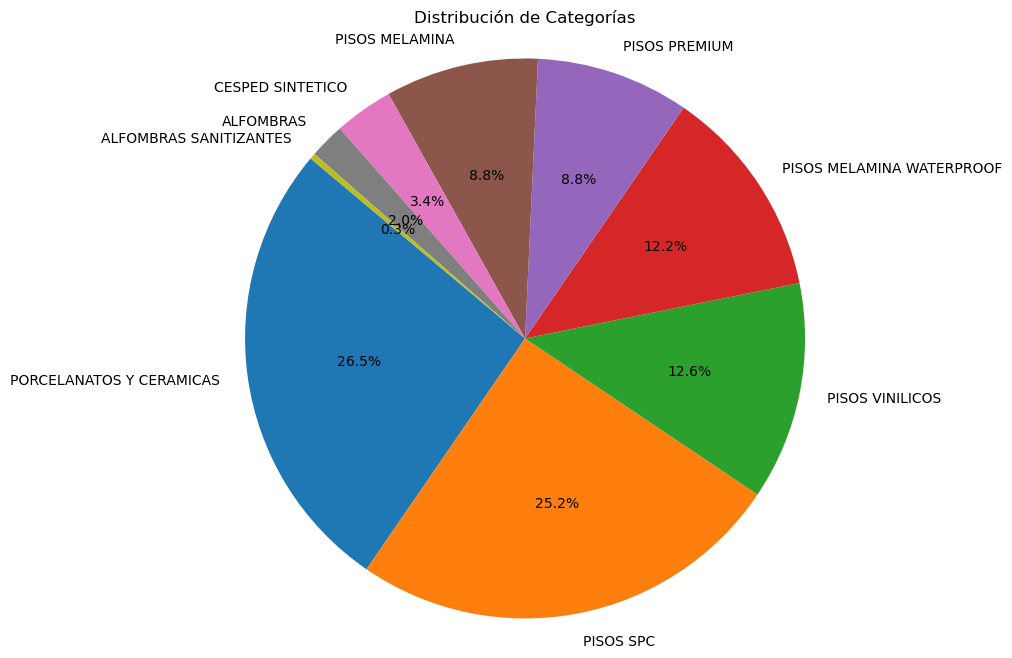

In [17]:
plt.figure(figsize=(10, 8))
plt.pie(products_by_family["Cant. Productos"], labels=products_by_family.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Categorías')
plt.axis('equal')
plt.show()

Como se observa en el grafco las familias con mayor cantidad de productos son la de *PORCELANATOS Y CERAMICAS*, seguido de *PISOS SPC*, cuyos porcentajes representan mas del <span style='color: #1F77B4; font-weight: bold'>25%</span> cada uno. Tambien tienen un participacion relevante los *PISOS VINILICOS* y *PISOS MELAMINA WATERPROOF* con un <span style='color: #1F77B4; font-weight: bold'>12%</span> aproximadamente cada uno

En el siguiente punto segmentaremos a los productos en 5 categorias segun su precio. Las mismas son:
- Producto economico: Aquellos que destacan mas por su precio que su caracteristicas
- Rebajado: Tienen un precio inferior al que tiene el mercado
- Precio normal: Se encuentran en la media de productos que ofrece la empresa
- Superior: valen un poco mas que la media de productos
- Premium: por su valor, se entiende que deben ser productos con caracteristicas superiores

In [18]:
products["Categoria_precio"] = pd.qcut(x=products["Precio Normal"], q=5, labels=['Producto Economico', 'Rebajado', 'Precio normal', 'Superior', 'Producto Premium'])
products.head(5)

,ID,Nombre Producto,Categorias,Estado,Precio Normal,Stock Cantidad,Categoria_precio
0,23973,Ágora Residencial,PISOS MELAMINA WATERPROOF,pending,18.27,11906,Precio normal
1,23972,Alborada Homes,PISOS MELAMINA WATERPROOF,pending,18.27,2091,Precio normal
2,23971,Altamar Suites,PISOS MELAMINA WATERPROOF,pending,18.27,11354,Precio normal
3,23937,Amanecer Urbano,PISOS MELAMINA WATERPROOF,publish,18.27,25925,Precio normal
4,23936,Ámbar Living,PISOS MELAMINA WATERPROOF,publish,18.27,6260,Precio normal


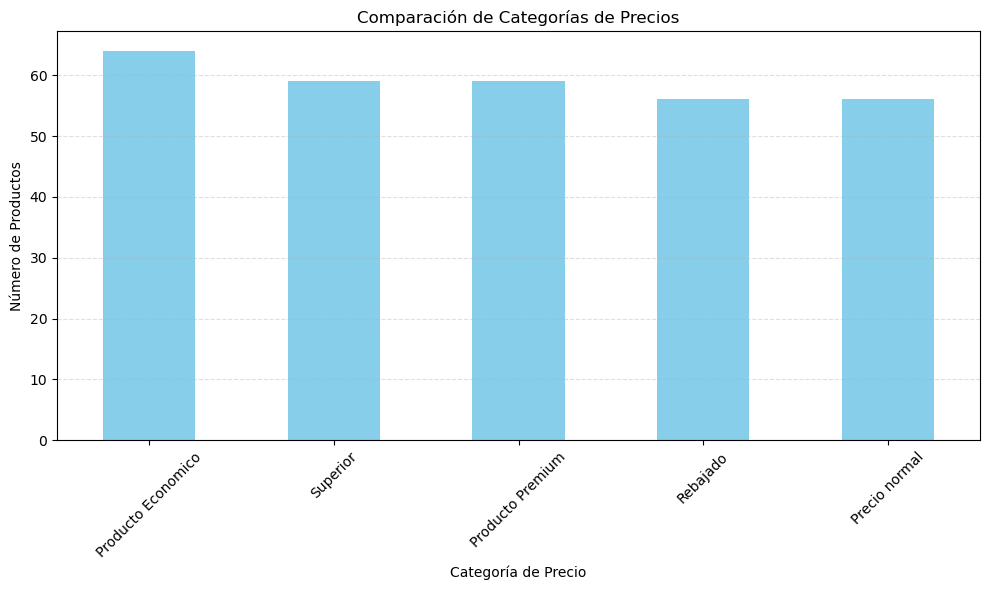

In [19]:
price_counts = products['Categoria_precio'].value_counts()
plt.figure(figsize=(10, 6))
price_counts.plot(kind='bar', color='skyblue')
plt.title('Comparación de Categorías de Precios')
plt.xlabel('Categoría de Precio')
plt.ylabel('Número de Productos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Del grafico anterior se puede interpretar que si bien existe predominio de Productos economicos en el dataset, hay cierta diversidad y uniformidad en cuanto a la gama de productos

Por otro lado, podemos efectuar el mismo analisis pero a nivel categoria de producto:

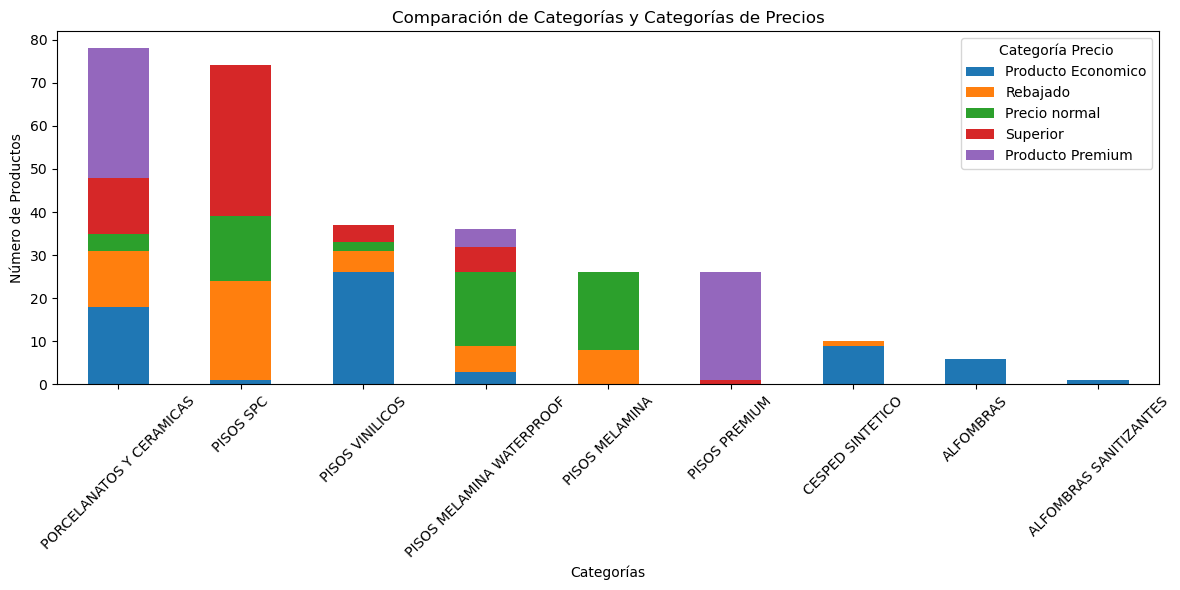

In [20]:
categories_prices_counts = products.groupby(['Categorias', 'Categoria_precio']).size().unstack(fill_value=0)
categories_prices_counts["Total"] = categories_prices_counts.sum(axis=1)
categories_prices_counts.sort_values("Total", ascending=False, inplace=True)
categories_prices_counts.drop(columns="Total", inplace=True)

# Crear el gráfico de barras agrupadas
categories_prices_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Ajustar etiquetas y título
plt.title('Comparación de Categorías y Categorías de Precios')
plt.xlabel('Categorías')
plt.ylabel('Número de Productos')
plt.xticks(rotation=45)
plt.legend(title='Categoría Precio')

plt.tight_layout()
plt.show()

Como resultado podemos llegar a las siguientes conclusiones:
- La mayor parte de los productos con <span style='color: #9467BD; font-weight: bold'>producto Premium</span> se encuentran en la familia *PORCELANATOS Y CERAMICAS* y *PISOS PREMIUM*
- Las categorias *CESPED SINTETICO*, *ALFOMBRAS* y *ALFOMBRAS SANITIZANTES* son las que estan conformadas esencialmente por <span style='color: #1F77B4; font-weight: bold'>productos Economicos</span>. Tambien se puede encontrar un participacion grande de estos produtos en la categoria *PISOS VINILICOS*
- La categoria *PISOS SPC* es la que tiene la mayor parte de los productos con <span style='color: #D62727; font-weight: bold'>precios Superior</span>

El stock disponible de productos esta detallado en la siguiente tabla:

In [21]:
stock_by_categories = products.groupby("Categorias")["Stock Cantidad"].sum()
stock_by_categories.sort_values(ascending=False, inplace=True)
stock_by_categories

Categorias
PORCELANATOS Y CERAMICAS     1474177
PISOS SPC                    1271389
PISOS MELAMINA WATERPROOF     705349
PISOS VINILICOS               681672
PISOS MELAMINA                449182
PISOS PREMIUM                 394196
CESPED SINTETICO              213146
ALFOMBRAS                     118258
ALFOMBRAS SANITIZANTES          3587
Name: Stock Cantidad, dtype: int64

## Analisis por clientes

In [22]:
q_total_clients = sales['ID_CLIENTE'].value_counts().sum()
print(f"La empresa comercializo en el perido analizado con un total de {q_total_clients} clientes")

La empresa comercializo en el perido analizado con un total de 7833 clientes


In [23]:
clients_by_state = sales["NOMBRE_PROVINCIA_CLIENTE"].value_counts(normalize=True)
clients_by_state = pd.DataFrame(clients_by_state)
clients_by_state.reset_index(inplace=True)
clients_by_state.head(5)

,NOMBRE_PROVINCIA_CLIENTE,proportion
0,Buenos aires,0.38
1,Santa fe,0.26
2,Capital federal,0.10
3,Córdoba,0.07
4,Entre rios,0.06


La concentracion demografica de los clientes es alta, siendo las provincias de Buenos Aires y Santa Fe las que en conjunto tienen un 63,64%

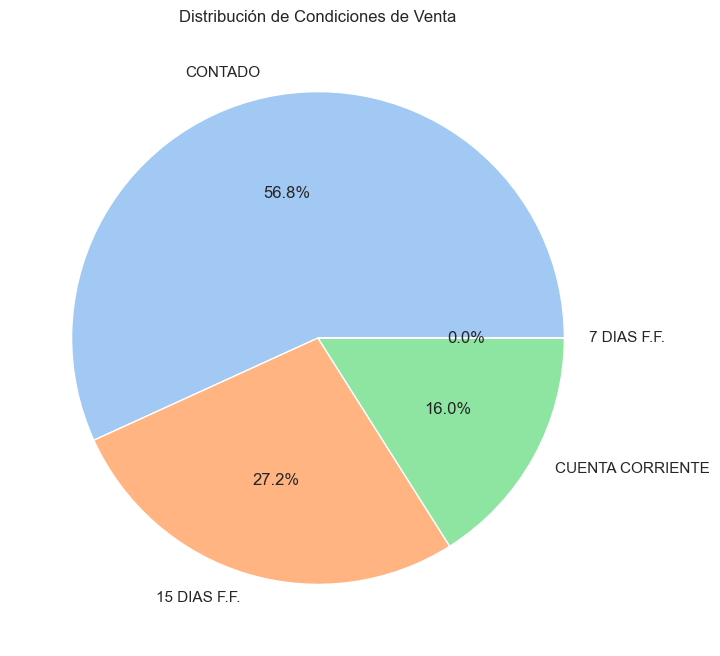

In [24]:
sales_payments = sales["DESCRIPCION_CONDICION_DE_VENTA"].value_counts(normalize=True)

plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.set_palette("pastel")
plt.pie(sales_payments, labels=sales_payments.index, autopct='%1.1f%%')
plt.title('Distribución de Condiciones de Venta')
plt.show()

## Top 20 Productos

El siguiente grafico muestra la concentracion de ventas en productos. Se observa que el piso <span style='color: #9467BD; font-weight: bold'>Producto Premium</span> tiene un gran porcentaje de venta respecto al resto y que, **Vega Residencial** y *Joya Preciosa* lo siguen con una participacion superior al resto. EL total de ventas para los siguientes pisos va decreciendo progresivamente.

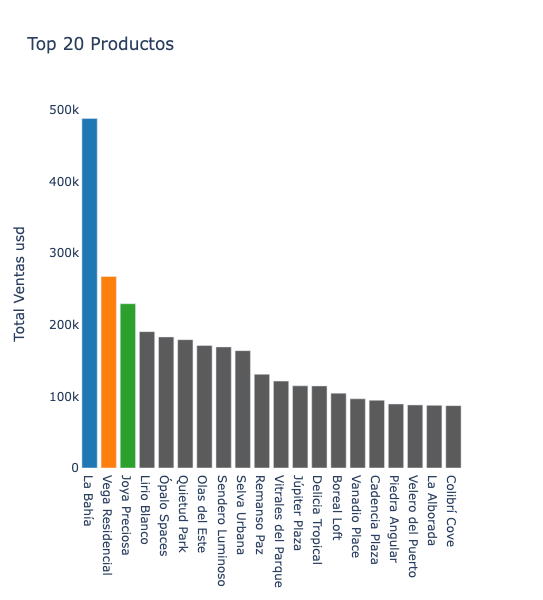

In [45]:
top_20_products = sales.groupby('Nombre Producto')['TOTAL_USD'].sum()
top_20_products = top_20_products.nlargest(n=20)
fig = px.bar(top_20_products, x=top_20_products.index, y='TOTAL_USD', title="Top 20 Productos")
fig.update_xaxes(title_text=None)
fig.update_yaxes(title_text="Total Ventas usd")
fig.update_layout(width=800, height=600, plot_bgcolor='rgba(0,0,0,0)')
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)']  # primeras tres barras
colors += ['#5b5b5b'] * (len(top_20_products) - 3)  # las restantes con color #5b5b5b
fig.update_traces(marker_color=colors)
fig.show()

## Top 20 Clientes

El siguiente grafico muestra la concentracion en la cartera de clientes. Como se observa, **Ward, Harvey and Goldner** representa un cliente importante para la empresa seguido de **Bergstron Inc** y **Ruecker, Zulauf and Price**. El resto de los clientes comparten niveles de ventas similares

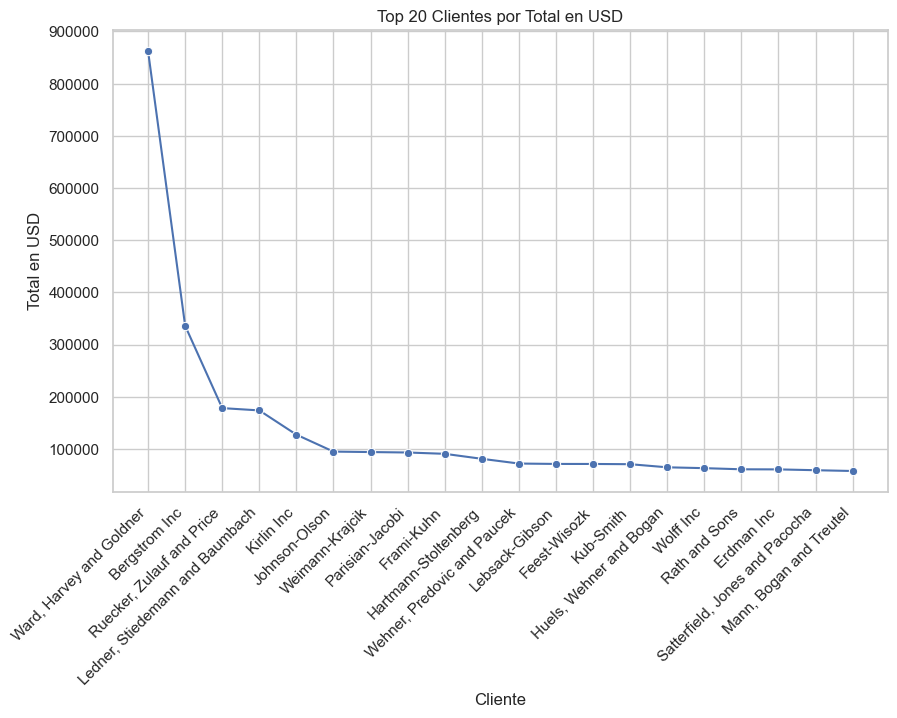

In [26]:
top_20_clients = sales.groupby("CLIENTE")['TOTAL_USD'].sum()
top_20_clients = top_20_clients.nlargest(n=20)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(x=top_20_clients.index, y=top_20_clients.values, marker='o')

plt.xlabel('Cliente')
plt.ylabel('Total en USD')
plt.title('Top 20 Clientes por Total en USD')

plt.xticks(rotation=45, ha='right')

plt.show()